# QMBU 450 : Final Project

In [274]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline

In [275]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Reading Yahoo Financial Data for Apple

In [276]:
import pandas_datareader
import datetime

In [277]:
import pandas_datareader.data as web

In [278]:
start = pd.to_datetime('2010-01-01')
finish = pd.to_datetime('2020-01-01')

In [279]:
apple = web.DataReader('AAPL', 'yahoo', start, finish)
apple.to_csv("apple.csv")

# Plotting the Stock Market Data for Apple

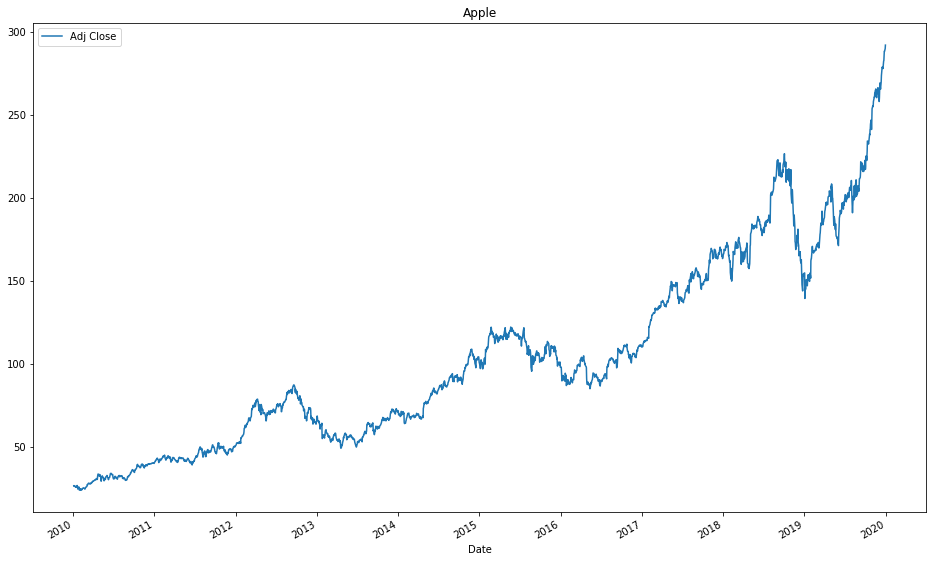

In [280]:
apple['Adj Close'].plot(label='Adj Close',figsize=(16,10),title = 'Apple')
plt.legend();
plt.savefig('Apple_Stock_Data.png')

# Splitting the data into testing and training sets
## Preferred manually splitting, because I want my test set to come after the training set
### The split is 80/20 

In [281]:
apple.dropna()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.466835
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.512596
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.090879
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.042646
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.215786
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,282.831299
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,288.442780
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,288.333313


In [282]:
split_date = pd.Timestamp('2018-01-01')

In [283]:
train = apple.loc[:split_date]
test = apple.loc[split_date:]

In [284]:
train = train.drop(['Volume','Close'], axis=1)
test = test.drop(['Volume','Close'], axis=1)

# Scale and Preprocess the data

In [285]:
from sklearn.preprocessing import MinMaxScaler

In [286]:
sc = MinMaxScaler()

In [287]:
train_sc = sc.fit_transform(train)
test_sc = sc.fit_transform(test)

In [288]:
X_train = train_sc[:,:-1]
y_train = train_sc[:,-1:]

In [289]:
X_test = test_sc[:,:-1]
y_test = test_sc[:,-1:]

In [290]:
X_train_t = X_train[:,None]
X_test_t = X_test[:,None]

# Using LSTM to create the model
## 1. Defining the Network

In [314]:
model = Sequential()
model.add(LSTM(6, input_shape=(1,3)))
model.add(Dense(1, activation='sigmoid'))

## 2. Compiling the Network

In [315]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [316]:
early_stop = EarlyStopping(monitor='loss',patience=1,verbose=1,min_delta=5)

# Train the model

In [317]:
model.fit(X_train_t, y_train, epochs=1, batch_size=1, verbose=1, callbacks=[early_stop])

Train on 2013 samples
2013/2013 [==============================] - 9s 4ms/sample - loss: 0.0206


# Predictions on test set

In [310]:
y_pred = model.predict(X_test_t)

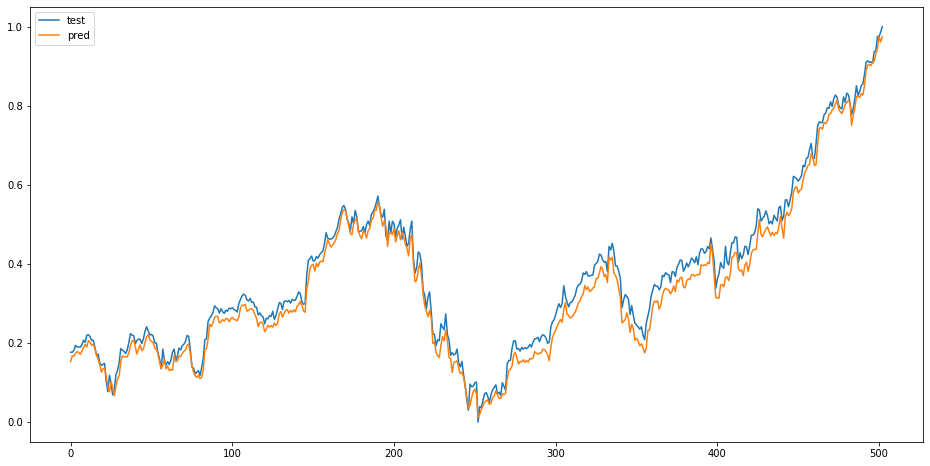

In [311]:
plt.figure(figsize=(16,8))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['test','pred']);
plt.savefig('Test_Prediction_Comparison.png')

# Error Bar Plot

In [312]:
x = np.arange(y_pred.shape[0])

In [313]:
mse = mean_squared_error(y_test, y_pred)
mse

0.0009190784810318114

In [303]:
yerr = y_pred - y_test

In [304]:
abs_error = np.absolute(yerr)

/Users/sitarearslanturk/opt/anaconda3/envs/qmbu450/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


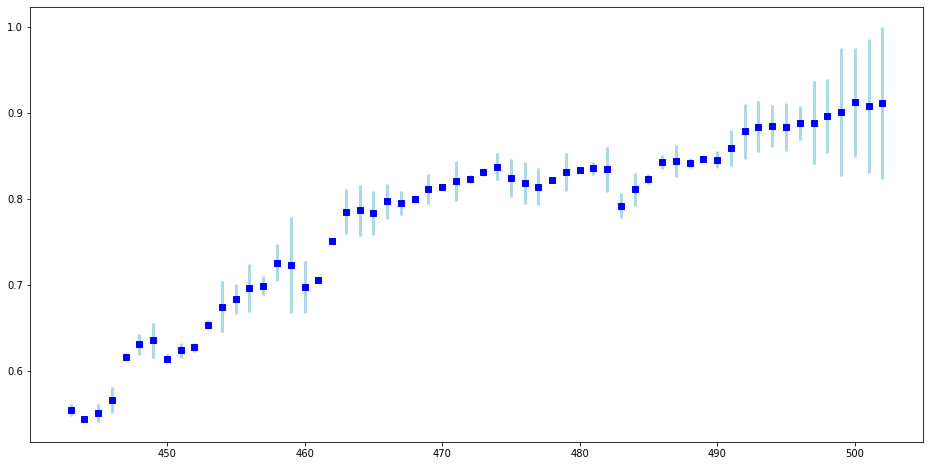

In [305]:
plt.figure(figsize=(16,8))
plt.errorbar(x[-60:], y_pred[-60:], yerr=abs_error[-60:], fmt='s', color='blue',
ecolor='lightblue', elinewidth=3, capsize=0);
plt.savefig('Error_Bar.png')